# Sentence Correction using Recurrent Neural Networks



---



# Table of Contents

*   [2. Preprocessing](#section2)




---



# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading Datasets

In [ ]:
data_path = '/content/drive/MyDrive/CS2/2.Datasets/'

In [ ]:
data = pd.read_csv(data_path + 'final_data.csv')
data.shape

(101717, 2)

In [ ]:
data.head()

,input_text,output_text
0,"Ofcouse , I love cheap fashion , fast fashion ...","Of course , I love cheap , fast fashion like f..."
1,If he want to listen to music that I do n't li...,If he wants to listen to music that I do n't l...
2,This happened because of the cultural differen...,This happened because of the cultural differen...
3,I 'm gon na earn much money to study abroad .,I 'm gon na earn enough money to study abroad .
4,It is not difficult for me but answer phones a...,It is not difficult for me but answering the p...


# Preprocessing

In [ ]:
def preprocessing(text):
  
    text = re.sub('<.*>', '', text)
    text = re.sub('\(.*\)', '', text)
    text = re.sub('\[.*\]', '', text)
    text = re.sub('{.*}', '', text)
    text = re.sub("[-+@#^/|*(){}$~`<>=_]","",text)
    text = text.replace("\\","")
    text = re.sub("\[","",text)
    text = re.sub("\]","",text)
    text = re.sub("[0-9]","",text)
    return text

In [ ]:
data['input_text'] = data['input_text'].apply(lambda x: preprocessing(x))
data['output_text'] = data['output_text'].apply(lambda x: preprocessing(x))

In [ ]:
data.head()

,input_text,output_text
0,"Ofcouse , I love cheap fashion , fast fashion ...","Of course , I love cheap , fast fashion like f..."
1,If he want to listen to music that I do n't li...,If he wants to listen to music that I do n't l...
2,This happened because of the cultural differen...,This happened because of the cultural differen...
3,I 'm gon na earn much money to study abroad .,I 'm gon na earn enough money to study abroad .
4,It is not difficult for me but answer phones a...,It is not difficult for me but answering the p...


# Checking Abbreviations

In [ ]:
# ref: https://www.kaggle.com/nmaguette/up-to-date-list-of-slangs-for-text-preprocessing

abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", 
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [ ]:
def get_abbrev(text):    
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.lower() in abbreviations.keys()]
    text = ' '.join(tokens)
    return text

data['in_abbreviations'] = data['input_text'].apply(lambda x: get_abbrev(x))
data['out_abbreviations'] = data['output_text'].apply(lambda x: get_abbrev(x))


abb = []
for i in abbreviations.keys():
    if not data[data['in_abbreviations'].str.contains(i, na=False, case=False)].empty:
        abb.append(i)
print("Abbreviations in Input Text: {}\n{}\n".format(len(abb), abb))

abb = []
for i in abbreviations.keys():
    if not data[data['out_abbreviations'].str.contains(i, na=False, case=False)].empty:
        abb.append(i)
print("Abbreviations in Output Text: {}\n{}\n".format(len(abb), abb))

Abbreviations in Input Text: 75
['$', 'acct', 'app', 'approx', 'apps', 'asap', 'b+b', 'b.c', 'bae', 'bak', 'bbc', 'bbs', 'bout', 'bros', 'btw', 'cet', 'cf', 'cia', 'cu', 'cv', 'cya', 'dae', 'diy', 'eg', 'etc', 'faq', 'fb', 'fc', 'fig', 'fyi', 'gal', 'goat', 'gps', 'hp', 'hr', 'ic', 'icq', 'idk', 'ie', 'i.e', 'IG', 'iirc', 'jk', 'lol', 'ltd', 'mf', 'mr', 'mrw', 'ms', 'mte', 'nagi', 'nhs', 'nth', 'nvr', 'nyc', 'oc', 'og', 'oic', 'omg', 'p.a', 'pm', 'pov', 'pp', 'ppl', 'ps', 'pt', 'sq', 'thks', 'tho', 'thx', 'til', 'ttyl', 'u', 'wtf', 'zzz']

Abbreviations in Output Text: 64
['$', 'app', 'apps', 'asap', 'b+b', 'b.c', 'bae', 'bbc', 'bbs', 'bout', 'bros', 'btw', 'cet', 'cf', 'cia', 'cu', 'cv', 'diy', 'eg', 'etc', 'faq', 'fb', 'fc', 'fig', 'ft.', 'ft', 'goat', 'gps', 'hp', 'hr', 'ic', 'icq', 'idk', 'ie', 'i.e', 'IG', 'iirc', 'jk', 'lmao', 'lol', 'ltd', 'mf', 'mr', 'ms', 'mte', 'nagi', 'nhs', 'nyc', 'oc', 'og', 'omg', 'p.a', 'pm', 'pov', 'pp', 'ppl', 'ps', 'pt', 'tho', 'til', 'ttyl', 'u', 'wt

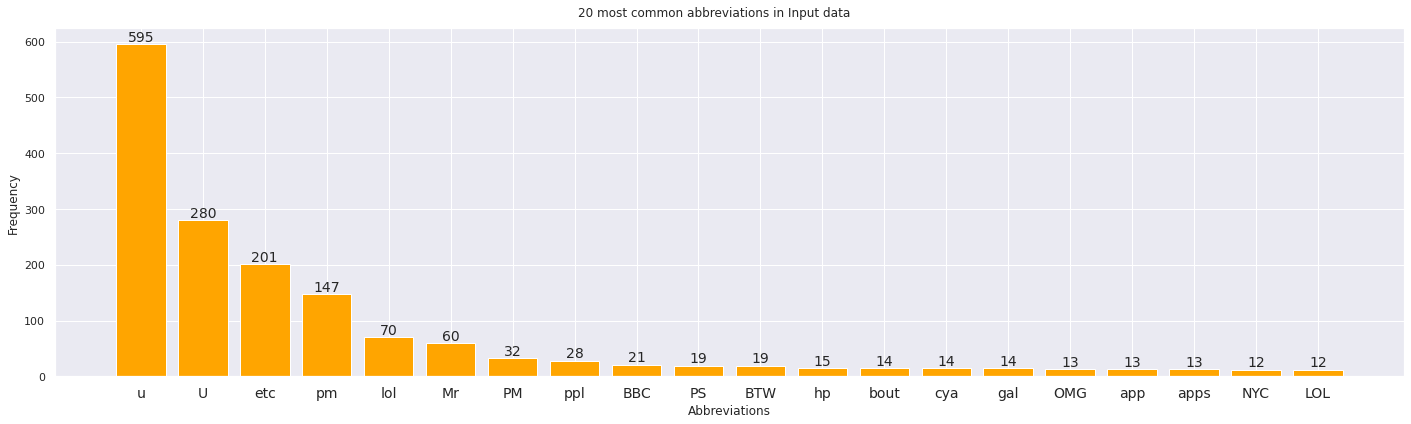

In [ ]:
abbrv_in_data = data.in_abbreviations.str.get_dummies(sep=' ').sum().sort_values(ascending=False)

x = np.arange(20)
fig, ax = plt.subplots(1, 1, figsize=(20,6))
ax.bar(x, abbrv_in_data[:20], color="orange", label='test')
ax.set_xticks(x)
ax.set_xticklabels(abbrv_in_data.index, fontsize=14)

fig.suptitle('20 most common abbreviations in Input data')

for i in x:
    ax.annotate(abbrv_in_data[i], xy=(i, abbrv_in_data[i]), textcoords="offset points", rotation=0, xytext=(0, 3), ha='center', fontsize=14)

plt.tight_layout(pad=3.0)
plt.xlabel('Abbreviations')
plt.ylabel('Frequency')
plt.show()

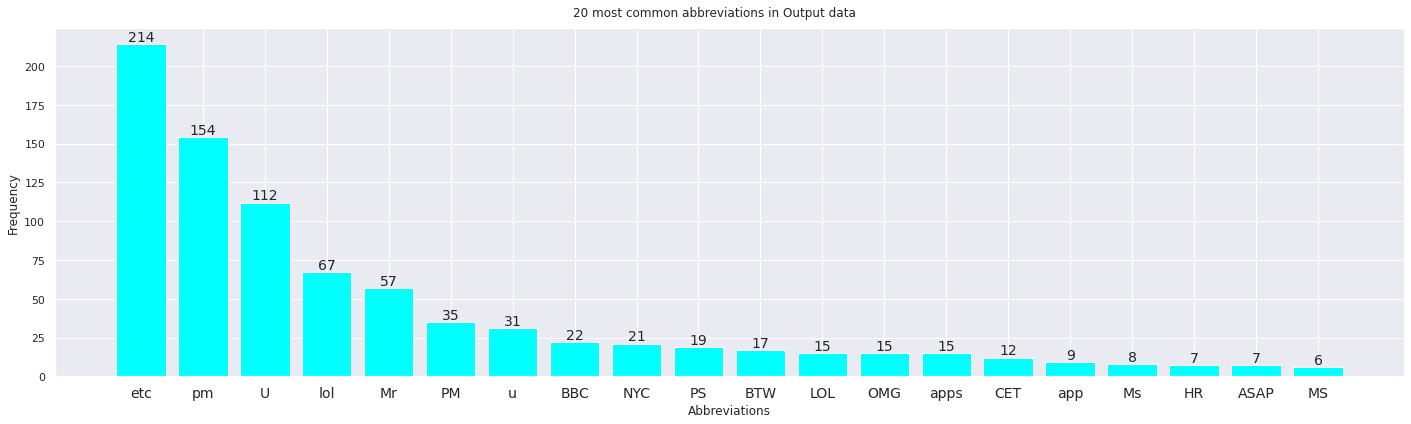

In [ ]:
abbrv_in_data = data.out_abbreviations.str.get_dummies(sep=' ').sum().sort_values(ascending=False)

x = np.arange(20)
fig, ax = plt.subplots(1, 1, figsize=(20,6))
ax.bar(x, abbrv_in_data[:20], color="cyan", label='test')
ax.set_xticks(x)
ax.set_xticklabels(abbrv_in_data.index, fontsize=14)

fig.suptitle('20 most common abbreviations in Output data')

for i in x:
    ax.annotate(abbrv_in_data[i], xy=(i, abbrv_in_data[i]), textcoords="offset points", rotation=0, xytext=(0, 3), ha='center', fontsize=14)

plt.tight_layout(pad=3.0)
plt.xlabel('Abbreviations')
plt.ylabel('Frequency')
plt.show()

In [ ]:
data.drop(columns=['in_abbreviations','out_abbreviations'], inplace=True)